In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Data

In [2]:
N = 100
X = np.random.normal(0,1,N)
e = np.random.normal(0,1,N)
b_true = 10.
Y = 0 + b_true*X + e

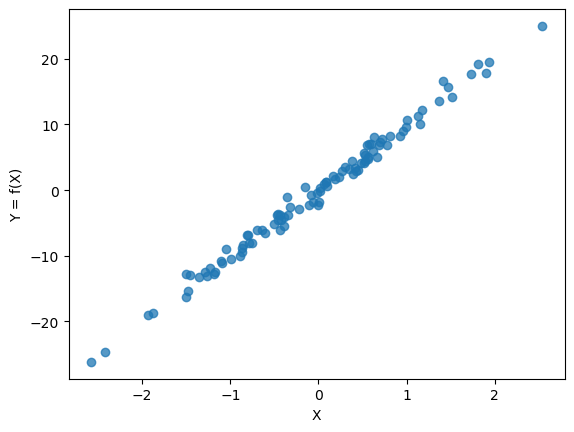

In [3]:
plt.plot(X, Y, 'o', alpha = 0.75)
plt.xlabel("X")
plt.ylabel("Y = f(X)")
plt.show()

# Numpy

In [4]:
def dL(beta, x, y):
    return np.mean(x * (x*beta - y))

grad_list = []
b_list = []

b = -30.

step_size = 0.1

for i in range(100):
    b_list.append(b)
    dLdb = dL(beta = b, x = X, y= Y)
    grad_list.append(dLdb)
    b -= step_size * dLdb
    
np.round(b, 4)

9.9575

# Torch

In [5]:
Xt = torch.tensor(X)
Yt = torch.tensor(Y)

def L(beta, x, y):
    return 1/(2*N) * torch.sum((x*beta - y) ** 2)

b_list2 = []
grad_list2 = []

b = torch.tensor(-30., requires_grad = True)

for i in range(100):
    b_list2.append(np.array(b.data))
    loss = L(beta = b, x = Xt, y = Yt)
    loss.backward()
    grad_list2.append(np.array(b.grad.data))
    b.data -= step_size * b.grad.data
    b.grad.data.zero_()
    
np.round(b.detach().numpy(),4)

9.9575

# Compare

In [6]:
df = pd.DataFrame({'grad_np':  grad_list, 
                   'grad_torch': grad_list2,
                   'beta_hat_np': b_list,
                   'beta_hat_torch': b_list2})
df.head()

,grad_np,grad_torch,beta_hat_np,beta_hat_torch
0,-38.356251,-38.35625,-30.000000,-30.0
1,-34.674486,-34.674484,-26.164375,-26.164375
2,-31.346127,-31.346127,-22.696926,-22.696926
3,-28.337254,-28.337254,-19.562314,-19.562313
4,-25.617198,-25.617199,-16.728588,-16.728588


# Torch syntax

In [7]:
N = 100
X = np.random.normal(0,1,N).reshape(-1,1)
e = np.random.normal(0,1,N).reshape(-1,1)
b_true = 10.
Y = 0 + b_true*X + e

Yt = torch.tensor(Y, dtype = torch.float32)
Xt = torch.tensor(X, dtype = torch.float32)

In [8]:
class LinReg(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinReg, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [9]:
model = LinReg(inputSize = 1, outputSize = 1)
loss_function = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
for i in range(100):
    optimizer.zero_grad()
    Yhat = model(Xt)
    loss = loss_function(Yhat, Yt)
    loss.backward()
    optimizer.step()

In [11]:
for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[10.0145]], requires_grad=True)
linear.bias Parameter containing:
tensor([-0.0489], requires_grad=True)


# Multiple Regression

In [12]:
N = int(1e3)
beta_true = np.array([1., 5., 10.])
x1, x2, e = np.random.normal(0,1,N), np.random.normal(0,1,N), np.random.normal(0,1,N)
X = np.array([np.ones(N), x1, x2]).T
Y = X @ beta_true + e

In [13]:
#(x'x)^-1 x'y
np.linalg.inv(X.T @ X) @ (X.T @ Y)

array([1.00259875, 4.97652367, 9.93077973])

In [14]:
Xt = torch.tensor(X)
Yt = torch.tensor(Y)
b = torch.tensor([-20.0, 300., 50.], requires_grad=True, dtype = torch.float64)

def predict(data, parameters):
    return data @ parameters

def L(yhat, y):
    return torch.mean((yhat - y) ** 2)

step_size = 0.1

for i in range(200):
    Yhat = predict(data = Xt, parameters = b)
    loss = L(yhat = Yhat, y = Yt)
    loss.backward()
    b.data -= step_size * b.grad.data
    b.grad.data.zero_()

b

tensor([1.0026, 4.9765, 9.9308], dtype=torch.float64, requires_grad=True)